<h2  style="text-align: center"> ML - Conecta café </h2><br>
<div style="text-align: justify"> Modelo de <i> machine learning </i> criado para a plataforma <b> Conecta Café </b> com o objetivo de reunir compradores de cafés especiais com cafeicultores que possuam <i>fit</i>.</div>

<h3> Contexto </h3><br>
<div style="text-align: justify"> 
    Com o avanço da tecnologia, a conexão entre produtores e consumidores de produtos e serviços de qualquer natureza está se tornando cada vez maior, uma vez que ela permite expandir e democratizar o acesso a deles.
    <br>
    Pensando nisso, foi criado uma plataforma Web que tem como propósito de conectar facilmente cafeicultores e consumidores de cafés especiais. Nessa aplicação, o produtor pode cadastrar os dados do café produzido permitindo assim, que compradores possam realizar a pesquisa e encontrar o café de sua escolha.
</div>

<h3> Problemática </h3><br>
<div style="text-align: justify"> 
    Ao acessar o site o consumidor pode buscar pelo café inserindo alguns dados em um filtro. Porém, pense que o comprador não sabe o que procura, é apenas alguém que não possui conhecimento sobre cafés especiais, mas gostaria de experimentar algo novo. Não seria interressante a plataforma entender o comportamento desse cliente e realizar recomendações baseadas em alguns dados? </div>

<h3> Proposta </h3><br>
<div style="text-align: justify"> 
A proposta é aproximar compradores com cafeicultores que possuem características semelhantes. Como por exemplo, baseado na condição financeira, onde consumidores de grandes quantidades de café sejam agrupados com produtores que produzam o suficiente para atendê-los. Isso é pensado para reduzir o <i> overflow </i> de dados atual da plataforma e melhorar o sistema de busca da aplicação.</div>

---
<h2  style="text-align: center"> Projeto </h2>

<h3> Informações </h3>

Por ser uma plataforma ainda não colocada em produção, os dados ainda não foram coletados e por conta disso será criado um dataset que simula os dados reais.

Para simular os dados, algumas regras de negócios foram utilizadas para dar mais coerencia para os dataset, são elas:
- Regras para o Produtor: 
    - Produtores que produzem café especial não podem ter nota abaixo de 80;
    - Pela dificuldade de produzir café especial normalmente produtores que produzem esse tipo de café, produzem em uma quantidade menor de quem não produz;
    - Avaliar o range da pontuação do café com base na região.

- Regras para o Consumidor:
    - Possivelmente quem tem interesse em café especial, está disposto a gastar mais.
    - O tipo de consumidor (pessoa física ou jurídica) interfere na quantidade preterida, pois uma pessoa jurídica normalmente é um estabelecimento, ou seja, busca uma maior quantidade de cafés para compra.

<h3> Repositórios </h3>

- **[🤖 API da plataforma](https://github.com/Brendhon/conecta-cafe-api)**
- **[📟 Aplicação Web](https://github.com/GabrielGSD/Conecta_Cafe_React)**
- **[🎰 Projeto ML](https://github.com/Brendhon/conecta-cafe-ml)**

<h3> Autores </h3><br>

<div style="display: flex;"> 

<a href="https://github.com/Brendhon" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline; margin: 10px;" src="https://github.com/brendhon.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong > Brendhon Moreira </strong>
</a>
<br><br>
<a href="https://github.com/GabrielGSD" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline;  margin: 10px;" src="https://github.com/GabrielGSD.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong > Gabriel Daniel </strong>
</a>
<br><br>
<a href="https://github.com/MoisesSDelmoro" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline;  margin: 10px;" src="https://github.com/MoisesSDelmoro.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong >Moises Delmoro</strong>
</a></div>

---
<h2  style="text-align: center"> Desenvolvimento </h2><br>

In [1]:
# Instalando os pacotes necessários
import sys
!{sys.executable} -m pip install pandas 
!{sys.executable} -m pip install numpy 
!{sys.executable} -m pip install requests

In [2]:
# Importar as biblotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Permitir que as funções do arquivo de funções auxiliares sejam utilizadas
%run auxiliary_functions.ipynb   

<h3> Declarando Variaveis </h3>

In [3]:
# Variaveis gerais
dataset_size = 1000
dataset_seed = 42

# Variaveis do consumidor
consumer_cols = "ifcccc"
consumer_col_names = ["id", "financial_condition", "residence", "search_special_coffee", 'desired_quantity', 'person_type']
consumer_intervals = [(1,100000000), (10.0,500.0), [1,2,3,4,5,6], [True, False], [0.5, 1, 60], [1,2]]

# Variaveis do produtor
producer_cols = "iccci"
producer_col_names = ["id", "quantity_produced", "residence", "produces_special_coffee", "coffee_score"]
producer_intervals = [(1,100000000), [0.5, 1, 60], [1,2,3,4,5,6], [True, False],  (0,100)]

---

<h3> Gerando tabelas auxiliares  </h3>
<br>
<i> Observação: Para poder utilizar os dados no modelo é necessario indexar certos atributos para que o modelo seja capaz de entender os dados, para isso foi feito a criação dessas tabelas </i><br>

In [4]:
# Tabela de residencias b
states = ["Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná"]
states_id=[1,2,3,4,5,6]
residence_df = pd.DataFrame(data=np.array([states_id, states]), index=["residence_id", "residence_name"]).T
residence_df

# Durante algumas pesquisas foi encontrado os principais produtores de café no pais e com esses dados essa tabela foi criada
# Reference: https://www.mokaclube.com.br/blog/regioes-cafeeiras-do-brasil/

,residence_id,residence_name
0,1,Bahia
1,2,Minas Gerais
2,3,Espírito Santo
3,4,Rio de Janeiro
4,5,São Paulo
5,6,Paraná


In [5]:
# Tabela de Tipo de pessoa (Física ou Jurídica)
consumer_type = ["Pessoa Física", "Pessoa Jurídica"]
consumer_type_id = [1,2]
consumer_type_df = pd.DataFrame(data=np.array([consumer_type_id, consumer_type]), index=["consumer_type_id", "consumer_type"]).T
consumer_type_df

,consumer_type_id,consumer_type
0,1,Pessoa Física
1,2,Pessoa Jurídica


---

<h3> Gerando os dados do consumidor </h3>

Pensando na coluna de quantidade preterida foi levado em conta se o consumidor é uma pessoa jurídica ou física. Isso é importante, pois uma pessoa jurídica normalmente é um estabelecimento, ou seja, busca uma maior quantidade de cafés para compra.

In [6]:
columns = ["person_type", "desired_quantity"]
data = generate_person_type_and_desired_quantity(dataset_size)
desired_quantity_df = pd.DataFrame(data=data, columns = columns)
desired_quantity_df.head(10)

,person_type,desired_quantity
0,1,1.0
1,2,60.0
2,2,60.0
3,1,0.5
4,2,60.0
5,1,1.0
6,1,0.5
7,2,60.0
8,1,0.5
9,1,0.5


<br> Possivelmente quem tem interesse em café especial, está disposto a gastar mais

In [7]:
columns=["search_special_coffee", "financial_condition"]
data=generate_search_special_coffee_and_financial_condition(dataset_size)
quantity_financial_condition = pd.DataFrame(data=data, columns=columns)
quantity_financial_condition.head()

,search_special_coffee,financial_condition
0,False,81
1,True,307
2,False,93
3,True,275
4,False,102


<h3> Gerando os dados do produtor </h3>

Pontuação do café gerada com base na altitude e qualidade médias dos cafés nos estados pesquisados

In [8]:
columns=["residence_id", "coffee_score"]
data=generate_coffee_score_and_residences(dataset_size)
coffee_score_df = pd.DataFrame(data=data, columns=columns)
coffee_score_df.head()

,residence_id,coffee_score
0,6,67
1,3,61
2,1,63
3,2,77
4,5,79


<br>Pela dificuldade de produzir café especial normalmente produtores que produzem esse tipo de café, produzem em uma quantidade menor de quem não produz.


In [9]:
columns=["produces_special_coffee", "quantity_produced"]
data=generate_produces_special_coffee_and_quantity_produced(dataset_size)
quantity_produced_df = pd.DataFrame(data=data, columns=columns)
quantity_produced_df.head()

,produces_special_coffee,quantity_produced
0,False,1052
1,True,502
2,True,593
3,True,855
4,True,373


---

<h3> Gerando os dataframes </h3>

In [10]:
# Dataframe do consumidor
consumer_df = generate_fake_dataframe(
  size = dataset_size, 
  cols = consumer_cols, 
  col_names = consumer_col_names,
  intervals = consumer_intervals,
  seed=dataset_seed)

# Dataframe do produtor
producer_df = generate_fake_dataframe(
  size = dataset_size, 
  cols = producer_cols, 
  col_names = producer_col_names,
  intervals = producer_intervals,
  seed=dataset_seed)

Obs: Os dados gerados pela função 'generate_fake_dataframe' não utiliza as regras de negocio definidas, portanto alguns de seus dados serão substituidos

#### Alterando as colunas geradas randomicamente pelas geradas utilizando as regras de negócio

In [11]:
# Alterando os dados do consumidor
consumer_df['person_type'] = desired_quantity_df['person_type']
consumer_df['desired_quantity'] = desired_quantity_df['desired_quantity']

consumer_df['search_special_coffee'] = quantity_financial_condition['search_special_coffee']
consumer_df['financial_condition'] = quantity_financial_condition['financial_condition']

# Alterando os dados do produtor
producer_df['residence'] = coffee_score_df['residence_id']
producer_df['coffee_score'] = coffee_score_df['coffee_score']

producer_df['produces_special_coffee'] = quantity_produced_df['produces_special_coffee']
producer_df['quantity_produced'] = quantity_produced_df['quantity_produced']

<br>
Baseado na regra de que produtores de café especial não podem ter nota abaixo de 80, os valores fora desse padrão serão removidos

In [12]:
# Removendo os produtores gerados que produzem café especial com nota abaixo de 80
producer_df = producer_df.drop(producer_df[(producer_df['produces_special_coffee'] == True) 
                                           & (producer_df['coffee_score']  < 80)].index)

#### Mostrando dataframes criados

In [13]:
# Mostrando uma amostra dos dados do produtor
producer_df.head(10)

,id,quantity_produced,residence,produces_special_coffee,coffee_score
0,8925096,1052,6,False,67
5,85859792,1088,5,False,77
6,8594564,862,6,False,65
9,9417735,902,2,False,80
10,52647898,469,6,False,67
11,97562235,629,2,False,78
14,71747727,872,4,False,62
15,78606430,658,4,False,90
16,51322657,1046,6,False,68
17,12811364,938,6,False,69


In [14]:
# Mostrando uma amostra dos dados do consumidor
consumer_df.head(10)

,id,financial_condition,residence,search_special_coffee,desired_quantity,person_type
0,8925096,81,3,False,1.0,1
1,77395605,307,2,True,60.0,2
2,65457152,93,3,False,60.0,2
3,43887844,275,4,True,0.5,1
4,43301524,102,1,False,60.0,2
5,85859792,246,5,True,1.0,1
6,8594564,94,2,False,0.5,1
7,69736803,127,6,False,60.0,2
8,20146954,128,5,False,0.5,1
9,9417735,292,2,True,0.5,1


---
<h3> Modelagem </h3>

#### Implementando PCA
Pela quantidade de variaveis ser alta o PCA será implementado para melhor visualizar os dados

In [15]:
# Declarando PCA com 2 dimenções
pca = PCA(n_components=2)

#### Declarando Modelo
Pela regra de negócio, faz sentido agrupar os consumidores e produtores em 3 grupos, ou seja, <i>n_clusters = 3</i>.

In [16]:
# Declarando modelo com 3 clusters
model = KMeans(n_clusters = 3)

### Consumidor

In [17]:
# Ajuste o modelo com consumer_df utilizando PCA para melhor visualização
data = pca.fit_transform(consumer_df)

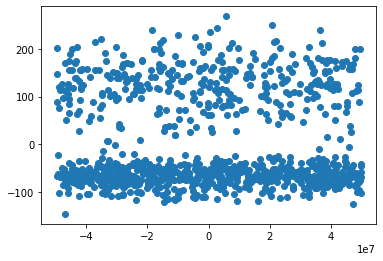

In [18]:
# Visualizando dados ajustados do consumidor
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#### Modelando dados

In [19]:
# Ajustando modelo com base nos dados fornecidos pelo PCA
fitting = model.fit(data)

# Pegando centroids
centers = fitting.cluster_centers_

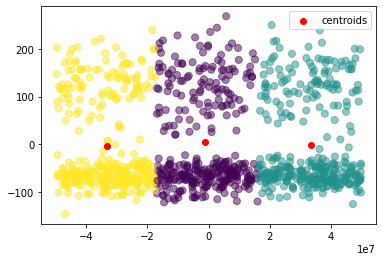

In [20]:
# Visualizando dados modelados e agrupados
plt.scatter(data[:, 0], data[:, 1], c= fitting.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker="o", color='r', label='centroids')
plt.legend(scatterpoints=1)
plt.show()

### Produtor
Pela quantidade de variaveis ser alta o PCA será implementado para melhor visualizar os dados

In [21]:
# Ajuste o modelo com producer_df utilizando PCA para melhor visualização
data = pca.fit_transform(producer_df)

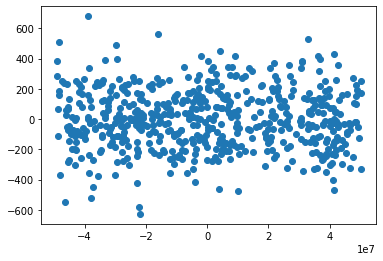

In [22]:
# Visualizando dados ajustados
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#### Modelando dados

In [23]:
# Ajuste o modelo
fitting = model.fit(data)

# Pegando centroids
centers = fitting.cluster_centers_

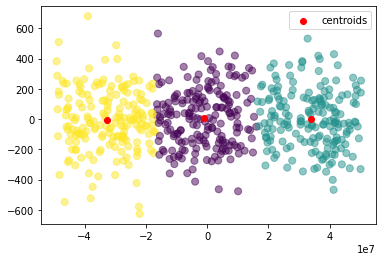

In [24]:
# Visualizando dados modelados e agrupados
plt.scatter(data[:, 0], data[:, 1], c= fitting.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker="o", color='r', label='centroids')
plt.legend(scatterpoints=1)
plt.show()